# Object Detection and Bounding Boxes

In [3]:
%matplotlib inline
import tensorflow as tf

You can upload the sample image below to be used in this section. They are the two major objects in this image.
https://drive.google.com/file/d/1cwZNrZ1AqLxBBXve77lfcojcklORLH86/view?usp=sharing

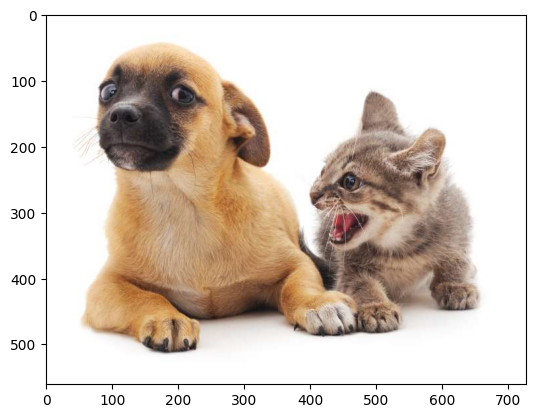

In [12]:
# show a picture
import matplotlib.pyplot as plt
img = plt.imread("/content/catdog.jpg")
plt.imshow(img)

## Bounding Boxes


In object detection,
we usually use a *bounding box* to describe the spatial location of an object.
The bounding box is rectangular, which is determined by the $x$ and $y$ coordinates of the upper-left corner of the rectangle and the such coordinates of the lower-right corner.
Another commonly used bounding box representation is the $(x, y)$-axis
coordinates of the bounding box center, and the width and height of the box.

[**Here we define functions to convert between**] these (**two
representations**):
`box_corner_to_center` converts from the two-corner
representation to the center-width-height presentation,
and `box_center_to_corner` vice versa.
The input argument `boxes` should be a two-dimensional tensor of
shape ($n$, 4), where $n$ is the number of bounding boxes.


In [13]:
def box_corner_to_center(boxes):
    """Convert from (upper-left, lower-right) to (center, width, height)."""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = tf.stack((cx, cy, w, h), axis=-1)
    return boxes

def box_center_to_corner(boxes):
    """Convert from (center, width, height) to (upper-left, lower-right)."""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = tf.stack((x1, y1, x2, y2), axis=-1)
    return boxes

We will [**define the bounding boxes of the dog and the cat in the image**] based
on the coordinate information.
The origin of the coordinates in the image
is the upper-left corner of the image, and to the right and down are the
positive directions of the $x$ and $y$ axes, respectively.


In [14]:
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

We can verify the correctness of the two
bounding box conversion functions by converting twice.


In [15]:
boxes = tf.constant((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

<tf.Tensor: shape=(2, 4), dtype=bool, numpy=
array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])>

Let us [**draw the bounding boxes in the image**] to check if they are accurate.
Before drawing, we will define a helper function `bbox_to_rect`. It represents the bounding box in the bounding box format of the  `matplotlib` package.


In [16]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

After adding the bounding boxes on the image,
we can see that the main outline of the two objects are basically inside the two boxes.


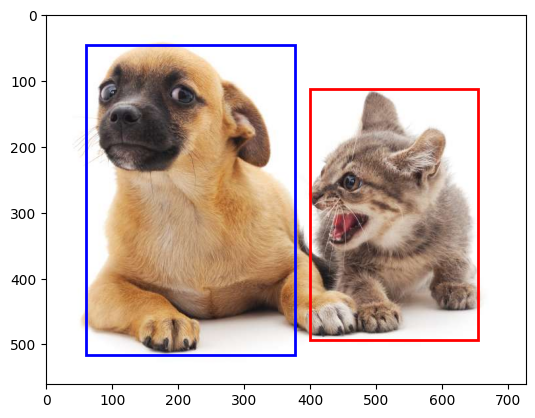

In [17]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

## Summary

* Object detection not only recognizes all the objects of interest in the image, but also their positions. The position is generally represented by a rectangular bounding box.
* We can convert between two commonly used bounding box representations.
